In [2]:
%matplotlib inline


# Animated image using a precomputed list of images



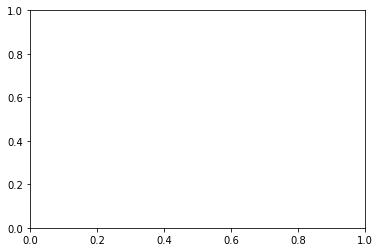

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display


path = "/home/sub/catkin_ws/src/Turtlebot3_Pheromone/tmp/20210406-161414/"

fig, ax = plt.subplots()




        
def pherogrid(n, time):
    # n - num of robots (int)
    # time - time_step (int)
    grids = [None]*n
    for i in range(n):
        with open(path + '{}_{}.npy'.format(i, time), 'rb') as f:
            grids[i] = np.load(f)
    sum_grids = np.maximum(grids[0], grids[1])
    return sum_grids
    

In [4]:
a = pherogrid(2, 0.1)

In [5]:
    

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
n = 2
ims = []
for i in range(1, 29):
        im = ax.imshow(pherogrid(n, i/10), animated=True)
        ims.append([im])
print(len(ims))
ani = animation.ArtistAnimation(fig, ims, interval=70, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

#plt.show()

28


In [13]:
def plot_anim(ims, n_frames):
    # plot images continuously as background.
    plt.show()
    for i in range(1, n_frames):
        ax.imshow(pherogrid(n, i/10))
        plt.pause(0.1)
        
        
        

In [15]:
plot_anim(a, 29)

In [48]:
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()